# Question 7: Mendel's first law
***
## Data Import

In [5]:
file = open('Input_Data/SampleData.txt')
file = file.read()
file

'2 2 2'

Here we have three values and these are discussed in the question Given section: 

Given: Three positive integers k, m, and n, representing a population containing k+m+n organisms: 
- k individuals are **homozygous dominant** for a factor, (**YY**) 
- m are **heterozygous** (**Yy**), and 
- n are **homozygous recessive**. (**yy**)



In [6]:
# lets set the parameters 

parameters = file.split(' ')
parameters

['2', '2', '2']

In [8]:
#Lets seperate the parameter string into the three different variables

k = int(parameters[0])
m = int(parameters[1])
n = int(parameters[2])
print(k, m, n)

2 2 2


***
## Analysis and Visualization

For this question, I decided to make a branch tree diagram while we solving the question to get both the visualization and the answer at the same time. I did some extensive researh and found that we can use the graphviz library to make the visualization that we want. I want to show how the ratios add up visually. Below are some links that helped me out. 

https://graphviz.readthedocs.io/en/stable/

https://anaconda.org/conda-forge/python-graphviz

In [10]:
# In the Graphviz library there are two modes we can use, I decided to use the Graph mode. 

from graphviz import Digraph
from graphviz import Graph

First lets try and get to know the library a bit and then wqe can proceed with answering the question. 

By following the sample in this link I was able to use this library 

https://graphviz.readthedocs.io/en/stable/manual.html#basic-usage

In [11]:

dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

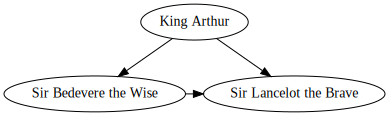

In [12]:
dot

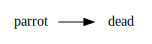

In [13]:
ps = Digraph(name='pet-shop', node_attr={'shape': 'plaintext'})
ps.node('parrot')
ps.node('dead')
ps.edge('parrot', 'dead')
ps.graph_attr['rankdir'] = 'LR'
ps

In [14]:
h = Graph('html_table')
h.node('tab', shape='plaintext',label='''<<TABLE>
<TR>
<TD>left</TD>
<TD>right</TD>
</TR>
</TABLE>>''')

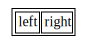

In [15]:
h

I am now going to stick with the Graph mode and not use the Diagraph mode because I dont know if we can use it to make tables. 

Now lets start by making a punnett table

Here the table attribute has to given in HTML like format so therefore for each table, we first write the row and then its column values. So that is we first open up a table and then a row by use TR and the the column by using TD.     

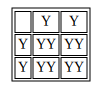

In [16]:


pun = Graph('Punnett')

#pun.attr()

pun.node('1', 
         shape = 'plaintext', 
         label = '''<<TABLE>
         <TR>
         <TD> </TD>
         <TD>Y</TD>
         <TD>Y</TD>
         </TR>
         <TR>
         <TD>Y</TD>
         <TD>YY</TD>
         <TD>YY</TD>
         </TR>
         <TR>
         <TD>Y</TD>
         <TD>YY</TD>
         <TD>YY</TD>
         </TR>
         </TABLE>>''')

pun


Now lets see if we can write the code but with values from outside such as p1, and p2. It seems we can comment them out and create this nice integration which is also good for the eye. 

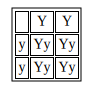

In [17]:
p1 = 'YY'
p2 = 'yy'

pun = Graph('Punnette')
pun.node('1', 
         shape = 'plaintext', 
         label = '''<<TABLE>
         <TR>
         <TD> </TD>
         <TD>'''+p1[0]+'''</TD>
         <TD>'''+p1[1]+'''</TD>
         </TR>
         <TR>
         <TD>'''+p2[0]+'''</TD>
         <TD>'''+p1[0]+p2[0]+'''</TD>
         <TD>'''+p1[1]+p2[0]+'''</TD>
         </TR>
         <TR>
         <TD>'''+p2[1]+'''</TD>
         <TD>'''+p1[0]+p2[1]+'''</TD>
         <TD>'''+p1[1]+p2[1]+'''</TD>
         </TR>
         </TABLE>>''')

pun

Now lets try making the boxes and connecting them by using the for loop 

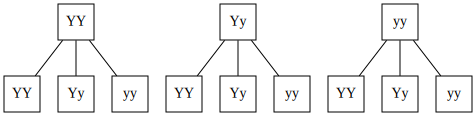

In [18]:
dk = 'YY'
dm = 'Yy'
dn = 'yy'
pun = Graph('Punnett')

for i in (dk, dm, dn): 
    
    first = '1'+i                                      # Using this line to give different names to each first pick box 1YY, 1Yy, 1yy
    pun.node(first, shape = 'square', label = i)
    
    for j in (dk, dm, dn): 
        second = first+'2'+j                           # Using this line to give names to every second pick 1YY2YY 1YY2Yy 1YY2yy, ...........
        pun.node(second, shape = 'square', label = j)
        
        pun.edge(first, second)                        # Using thisw line to make the lines between the boxes. 
        
pun

***

In [ ]:
p1 = 'YY'
p2 = 'yy'

c1=p1[0]+p2[0]
c2=p1[0]+p2[1]
c3=p1[1]+p2[0]
c4=p1[1]+p2[1]

dom = 0

for i in [c1, c2, c3, c4]:
    if "Y" in i: 
        dom += 1

ratio = str(dom)+'/4'

pun = Graph('Punnette')
pun.node('1', 
         shape = 'plaintext', 
         label = '''<<TABLE BORDER = '0'>
                         <TR>
                             <TD>
                                 <TABLE>
                                     <TR>
                                         <TD> </TD>
                                         <TD>'''+p1[0]+'''</TD>
                                         <TD>'''+p1[1]+'''</TD>
                                     </TR>
                                     <TR>
                                         <TD>'''+p2[0]+'''</TD>
                                         <TD>'''+c1+'''</TD>
                                         <TD>'''+c2+'''</TD>
                                     </TR>
                                     <TR>
                                         <TD>'''+p2[1]+'''</TD>
                                         <TD>'''+c3+'''</TD>
                                         <TD>'''+c4+'''</TD>
                                     </TR>
                                 </TABLE>
                             </TD>
                             <TD>'''+ratio+'''</TD>
                         </TR>
                    </TABLE>>''')

pun

In [ ]:
def punnett(p1, p2):

    c1=p1[0]+p2[0]
    c2=p1[0]+p2[1]
    c3=p1[1]+p2[0]
    c4=p1[1]+p2[1]

    dom = 0

    for i in [c1, c2, c3, c4]:
        if "Y" in i: 
            dom += 1

    ratio = str(dom)+'/4'

    pun = Graph('Punnette')
    pun.node('1', 
             shape = 'plaintext', 
             label = '''<<TABLE BORDER = '0'>
                             <TR>
                                 <TD>
                                     <TABLE>
                                         <TR>
                                             <TD> </TD>
                                             <TD>'''+p1[0]+'''</TD>
                                             <TD>'''+p1[1]+'''</TD>
                                         </TR>
                                         <TR>
                                             <TD>'''+p2[0]+'''</TD>
                                             <TD>'''+c1+'''</TD>
                                             <TD>'''+c2+'''</TD>
                                         </TR>
                                         <TR>
                                             <TD>'''+p2[1]+'''</TD>
                                             <TD>'''+c3+'''</TD>
                                             <TD>'''+c4+'''</TD>
                                         </TR>
                                     </TABLE>
                                 </TD>
                                 <TD>'''+ratio+'''</TD>
                             </TR>
                        </TABLE>>''')
    
    return(pun, dom)


In [ ]:
diagram, dominant = punnett("Yy", "Yy")

In [ ]:
dominant

In [ ]:
diagram

In [ ]:
h = Graph('html_table')
h.node('tab', shape='plaintext',label=)

***

Now lets try to make a for loop such that it takes the variables values and calculates the ratios to it. 

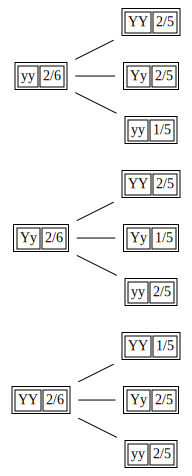

In [19]:
k = 2
m = 2
n = 2

TotOrganism = k+m+n

dk = 'YY'
dm = 'Yy'
dn = 'yy'

pun = Graph('Punnett')
for i in (dk, dm, dn): 

    first = '1'+i
    
    pun.node(first, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+i+'</TD> <TD>'+str(k)+'/'+str(TotOrganism)+'</TD> </TR> </TABLE>>')
    
    for j in (dk, dm, dn): 
        second = first+'2'+j
        
        if i == j: 
            pun.node(second, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+j+'</TD> <TD>'+str(1)+'/'+str(TotOrganism-1)+'</TD> </TR> </TABLE>>')
            
        else: 
            pun.node(second, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+j+'</TD> <TD>'+str(2)+'/'+str(TotOrganism-1)+'</TD> </TR> </TABLE>>')

        pun.edge(first, second)
pun.attr(rankdir='LR')  
pun



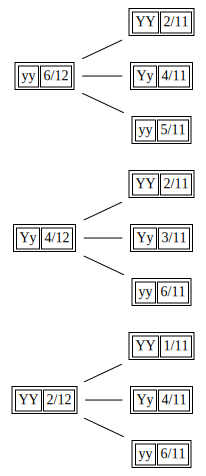

In [21]:
#lets try to calculate the ratio 

k = 2
m = 4
n = 6

TotOrganism = k+m+n

dk = 'YY'
dm = 'Yy'
dn = 'yy'

pun = Graph('Punnett')
for i in (dk, dm, dn): 

    first = '1'+i
    
    if i == 'YY':
        numerator1 = k
    elif i == 'Yy': 
        numerator1 = m
    else: 
        numerator1 = n
    
    pun.node(first, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+i+'</TD> <TD>'+str(numerator1)+'/'+str(TotOrganism)+'</TD> </TR> </TABLE>>')
    
    for j in (dk, dm, dn): 
        second = first+'2'+j
        
        if j == 'YY':
            numerator2 = k -1
        elif j == 'Yy': 
            numerator2 = m -1
        else: 
            numerator2 = n -1
        
        if i == j: 
            pun.node(second, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+j+'</TD> <TD>'+str(numerator2)+'/'+str(TotOrganism-1)+'</TD> </TR> </TABLE>>')
            
        else: 
            pun.node(second, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+j+'</TD> <TD>'+str(numerator2+1)+'/'+str(TotOrganism-1)+'</TD> </TR> </TABLE>>')

        pun.edge(first, second)
pun.attr(rankdir='LR')  
pun



In [ ]:
def punnett(p1, p2):

    c1=p1[0]+p2[0]
    c2=p1[0]+p2[1]
    c3=p1[1]+p2[0]
    c4=p1[1]+p2[1]

    dom = 0

    for i in [c1, c2, c3, c4]:
        if "Y" in i: 
            dom += 1

    ratio = str(dom)+'/4'

    pun = Graph('Punnette')
    pun.node('1', 
             shape = 'plaintext', 
             label = '''<<TABLE BORDER = '0'>
                             <TR>
                                 <TD>
                                     <TABLE>
                                         <TR>
                                             <TD> </TD>
                                             <TD>'''+p1[0]+'''</TD>
                                             <TD>'''+p1[1]+'''</TD>
                                         </TR>
                                         <TR>
                                             <TD>'''+p2[0]+'''</TD>
                                             <TD>'''+c1+'''</TD>
                                             <TD>'''+c2+'''</TD>
                                         </TR>
                                         <TR>
                                             <TD>'''+p2[1]+'''</TD>
                                             <TD>'''+c3+'''</TD>
                                             <TD>'''+c4+'''</TD>
                                         </TR>
                                     </TABLE>
                                 </TD>
                                 <TD>'''+ratio+'''</TD>
                             </TR>
                        </TABLE>>''')
    
    return(pun, dom)

pun, dom = punnett('Yy', 'Yy')

print(dom)
pun

Now lets try making a function that makes the label attribute for each combination based on the which teo organism it is so that we can use it in the for loop.

3


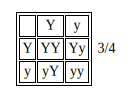

In [22]:
def punnett(p1, p2):                                                # Defining the function and calling the values p1, p2  YY, yy

    c1=p1[0]+p2[0]                                                  # here I am creating the four punnett combinations Yy, Yy, Yy, Yy 
    c2=p1[0]+p2[1]
    c3=p1[1]+p2[0]
    c4=p1[1]+p2[1]

    dom = 0                                                         # this is the variable for calculating how many punnett outputs will be dominant (with at least one Y out of the four)

    for i in [c1, c2, c3, c4]:                                      
        if "Y" in i: 
            dom += 1
        ratio = str(dom)+'/4'
 
    label = '''<<TABLE BORDER = '0'>
                     <TR>
                         <TD>
                             <TABLE>
                                 <TR>
                                     <TD> </TD>
                                     <TD>'''+p1[0]+'''</TD>
                                     <TD>'''+p1[1]+'''</TD>
                                 </TR>
                                 <TR>
                                     <TD>'''+p2[0]+'''</TD>
                                     <TD>'''+c1+'''</TD>
                                     <TD>'''+c2+'''</TD>
                                 </TR>
                                 <TR>
                                     <TD>'''+p2[1]+'''</TD>
                                     <TD>'''+c3+'''</TD>
                                     <TD>'''+c4+'''</TD>
                                 </TR>
                             </TABLE>
                         </TD>
                         <TD>'''+ratio+'''</TD>
                     </TR>
                </TABLE>>'''
    
    return(label, dom)

lab, dom = punnett('Yy', 'Yy')                                        # since two values are being returned by the function, I have twovariables before the = sign 

print(dom)

pun = Graph('Punnette')
pun.node('1', shape = 'plaintext',label = lab)
pun

Now lets get the diagram with the ratios

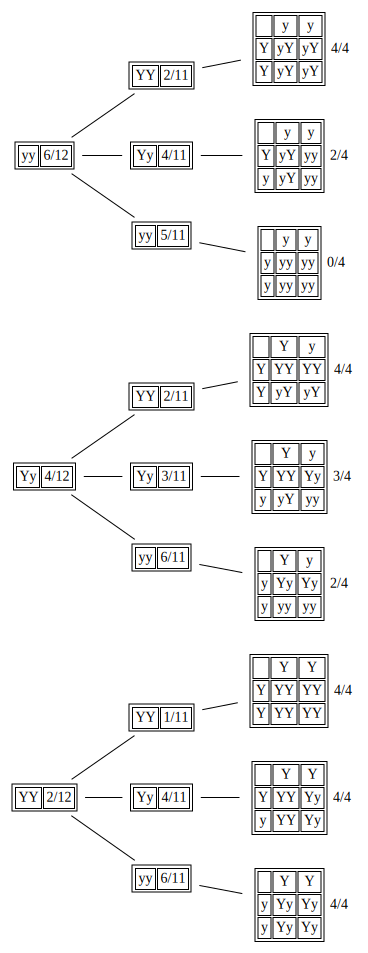

In [23]:
def punnett(p1, p2):

    c1=p1[0]+p2[0]
    c2=p1[0]+p2[1]
    c3=p1[1]+p2[0]
    c4=p1[1]+p2[1]

    dom = 0

    for i in [c1, c2, c3, c4]:
        if "Y" in i: 
            dom += 1
        ratio = str(dom)+'/4'

    label = '''<<TABLE BORDER = '0'>
                     <TR>
                         <TD>
                             <TABLE>
                                 <TR>
                                     <TD> </TD>
                                     <TD>'''+p1[0]+'''</TD>
                                     <TD>'''+p1[1]+'''</TD>
                                 </TR>
                                 <TR>
                                     <TD>'''+p2[0]+'''</TD>
                                     <TD>'''+c1+'''</TD>
                                     <TD>'''+c2+'''</TD>
                                 </TR>
                                 <TR>
                                     <TD>'''+p2[1]+'''</TD>
                                     <TD>'''+c3+'''</TD>
                                     <TD>'''+c4+'''</TD>
                                 </TR>
                             </TABLE>
                         </TD>
                         <TD>'''+ratio+'''</TD>
                     </TR>
                </TABLE>>'''
    
    return(label, dom)



# Lets try to include the punnett squares 

k = 2
m = 4
n = 6

TotOrganism = k+m+n

dk = 'YY'
dm = 'Yy'
dn = 'yy'

pun = Graph('Punnett')
for i in (dk, dm, dn): 

    first = '1'+i
    
    if i == 'YY':
        numerator1 = k
    elif i == 'Yy': 
        numerator1 = m
    else: 
        numerator1 = n
    
    pun.node(first, shape = 'plaintext', label = '''<<TABLE> 
                                                     <TR> 
                                                         <TD>'''+i+'''</TD> 
                                                         <TD>'''+str(numerator1)+'/'+str(TotOrganism)+'''</TD> 
                                                     </TR>
                                                    </TABLE>>''')
    
    for j in (dk, dm, dn): 
        second = first+'2'+j
        
        if j == 'YY':
            numerator2 = k -1
        elif j == 'Yy': 
            numerator2 = m -1
        else: 
            numerator2 = n -1
        
        if i == j: 
            pun.node(second, shape = 'plaintext', label = '''<<TABLE> 
                                                             <TR> 
                                                                 <TD>'''+j+'''</TD> 
                                                                 <TD>'''+str(numerator2)+'/'+str(TotOrganism-1)+'''</TD> 
                                                             </TR> 
                                                             </TABLE>>''')
                     
            lab, dom = punnett(i, j)
            pun.node(second+'pun', shape = 'plaintext',label = lab)
            
        else: 
            pun.node(second, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+j+'</TD> <TD>'+str(numerator2+1)+'/'+str(TotOrganism-1)+'</TD> </TR> </TABLE>>')
            lab, dom = punnett(i, j)
            pun.node(second+'pun', shape = 'plaintext',label = lab)
            
        pun.edge(first, second)
        pun.edge(second, second+'pun')
pun.attr(rankdir='LR')  
pun

Now lets add a dataframe to ollect the data points and ratios

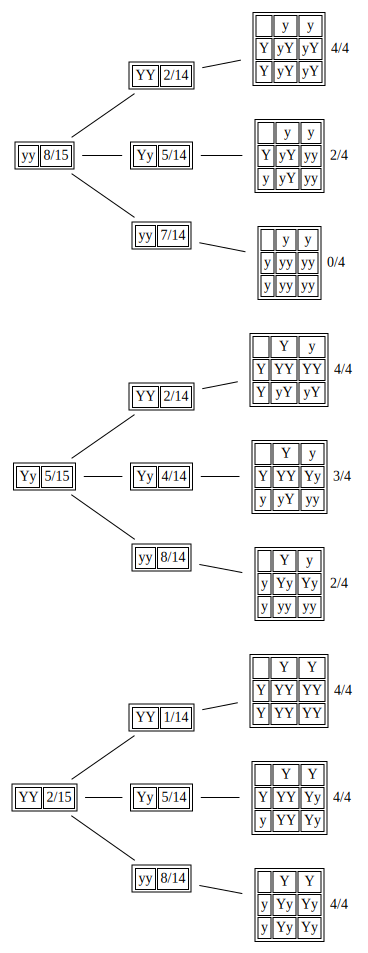

In [24]:
# Now lets add the dataframe to this to collect the data and calculate the ratio 

import pandas as pd 
from graphviz import Graph


def punnett(p1, p2):

    c1=p1[0]+p2[0]
    c2=p1[0]+p2[1]
    c3=p1[1]+p2[0]
    c4=p1[1]+p2[1]

    dom = 0

    for i in [c1, c2, c3, c4]:
        if "Y" in i: 
            dom += 1

        ratio = str(dom)+'/4'

 
        label = '''<<TABLE BORDER = '0'>
                         <TR>
                             <TD>
                                 <TABLE>
                                     <TR>
                                         <TD> </TD>
                                         <TD>'''+p1[0]+'''</TD>
                                         <TD>'''+p1[1]+'''</TD>
                                     </TR>
                                     <TR>
                                         <TD>'''+p2[0]+'''</TD>
                                         <TD>'''+c1+'''</TD>
                                         <TD>'''+c2+'''</TD>
                                     </TR>
                                     <TR>
                                         <TD>'''+p2[1]+'''</TD>
                                         <TD>'''+c3+'''</TD>
                                         <TD>'''+c4+'''</TD>
                                     </TR>
                                 </TABLE>
                             </TD>
                             <TD>'''+ratio+'''</TD>
                         </TR>
                    </TABLE>>'''
    
    return(label, dom)


df = pd.DataFrame(columns = ['F_Pick','F_ratio','F_ratio#', 'S_pick', 'S_ratio', 'S_ratio#', 'D_ratio', 'D_ratio#', 'Multiple'])


k = 2
m = 2
n = 2

TotOrganism = k+m+n

dk = 'YY'
dm = 'Yy'
dn = 'yy'

pun = Graph('Punnett')
for i in (dk, dm, dn): 

    first = '1'+i
    
    if i == 'YY':
        numerator1 = k
    elif i == 'Yy': 
        numerator1 = m
    else: 
        numerator1 = n
    
    pun.node(first, shape = 'plaintext', label = '''<<TABLE> 
                                                     <TR> 
                                                         <TD>'''+i+'''</TD> 
                                                         <TD>'''+str(numerator1)+'/'+str(TotOrganism)+'''</TD> 
                                                     </TR>
                                                    </TABLE>>''')
    
    for j in (dk, dm, dn): 
        second = first+'2'+j
        
        if j == 'YY':
            numerator2 = k -1
        elif j == 'Yy': 
            numerator2 = m -1
        else: 
            numerator2 = n -1
        
        if i == j: 
            pun.node(second, shape = 'plaintext', label = '''<<TABLE> 
                                                             <TR> 
                                                                 <TD>'''+j+'''</TD> 
                                                                 <TD>'''+str(numerator2)+'/'+str(TotOrganism-1)+'''</TD> 
                                                             </TR> 
                                                             </TABLE>>''')
                     
            lab, dom = punnett(i, j)
            pun.node(second+'pun', shape = 'plaintext',label = lab)
            
            df=df.append({'F_Pick': i,
                         'F_ratio': str(numerator1)+'/'+str(TotOrganism),
                         'F_ratio#': numerator1/TotOrganism, 
                         'S_pick': j, 
                         'S_ratio': str(numerator2)+'/'+str(TotOrganism-1), 
                         'S_ratio#': numerator2/(TotOrganism-1), 
                         'D_ratio': dom, 
                         'D_ratio#': dom/4, 
                         'Multiple': (numerator1/TotOrganism)*(numerator2/(TotOrganism-1))*(dom/4)}, ignore_index=True)
            
        else: 
            pun.node(second, shape = 'plaintext', label = '<<TABLE> <TR> <TD>'+j+'</TD> <TD>'+str(numerator2+1)+'/'+str(TotOrganism-1)+'</TD> </TR> </TABLE>>')
            lab, dom = punnett(i, j)
            pun.node(second+'pun', shape = 'plaintext',label = lab)
            df=df.append({'F_Pick': i,
                         'F_ratio': str(numerator1)+'/'+str(TotOrganism),
                         'F_ratio#': numerator1/TotOrganism, 
                         'S_pick': j, 
                         'S_ratio': str(numerator2+1)+'/'+str(TotOrganism-1), 
                         'S_ratio#': (numerator2+1)/(TotOrganism-1), 
                         'D_ratio': dom, 
                         'D_ratio#': dom/4, 
                         'Multiple': (numerator1/TotOrganism)*((numerator2+1)/(TotOrganism-1))*(dom/4)}, ignore_index=True)
            
        pun.edge(first, second)
        pun.edge(second, second+'pun')
pun.attr(rankdir='LR') 
pun

In [25]:
df

,F_Pick,F_ratio,F_ratio#,S_pick,S_ratio,S_ratio#,D_ratio,D_ratio#,Multiple
0,YY,2/15,0.133333,YY,1/14,0.071429,4,1.00,0.009524
1,YY,2/15,0.133333,Yy,5/14,0.357143,4,1.00,0.047619
2,YY,2/15,0.133333,yy,8/14,0.571429,4,1.00,0.076190
3,Yy,5/15,0.333333,YY,2/14,0.142857,4,1.00,0.047619
4,Yy,5/15,0.333333,Yy,4/14,0.285714,3,0.75,0.071429
5,Yy,5/15,0.333333,yy,8/14,0.571429,2,0.50,0.095238
6,yy,8/15,0.533333,YY,2/14,0.142857,4,1.00,0.076190
7,yy,8/15,0.533333,Yy,5/14,0.357143,2,0.50,0.095238
8,yy,8/15,0.533333,yy,7/14,0.500000,0,0.00,0.000000


In [26]:
df['Multiple'].sum()

0.5190476190476191

In [27]:
pun.render("Visualization/SampleData.gv", view=True)

'Visualization\\SampleData.gv.pdf'